## Geely Auto Assignment - Tim Kumar M B

In [71]:
#### Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm   

In [72]:
# Importing Dataset
master = pd.read_csv('CarPrice_Assignment.csv')

In [73]:
master.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [74]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

##### There are no null values in the dataset

### Data Cleansing

In [75]:
####Remove model name from the car names
master['CarName']=master['CarName'].apply(lambda x:x.split(" ")[0])

####CLassifying risk rating
def riskRating(x):
    if x<= -2 : return ("safe")
    elif x> -2 and x <=1 : return ("ok")
    else : return ("risky")
      
master['symboling']=master['symboling'].apply(lambda x: riskRating(x))

In [76]:
####Checking for unique category names
print(master['symboling'].unique())
print(master['CarName'].unique())
print(master['fueltype'].unique())
print(master['aspiration'].unique())
print(master['doornumber'].unique())
print(master['carbody'].unique())
print(master['drivewheel'].unique())
print(master['enginelocation'].unique())
print(master['enginetype'].unique())
print(master['cylindernumber'].unique())
print(master['fuelsystem'].unique())

['risky' 'ok' 'safe']
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota'
 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']
['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


##### There are few mis-spells based on the source website info provided for each category

In [77]:
####Name Corrections
master.replace({'CarName':{'maxda':'mazda','Nissan':'nissan','porcshce':'porsche',
                          'toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen'}},inplace=True)
print(master['CarName'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


### Exploratory Data Analysis

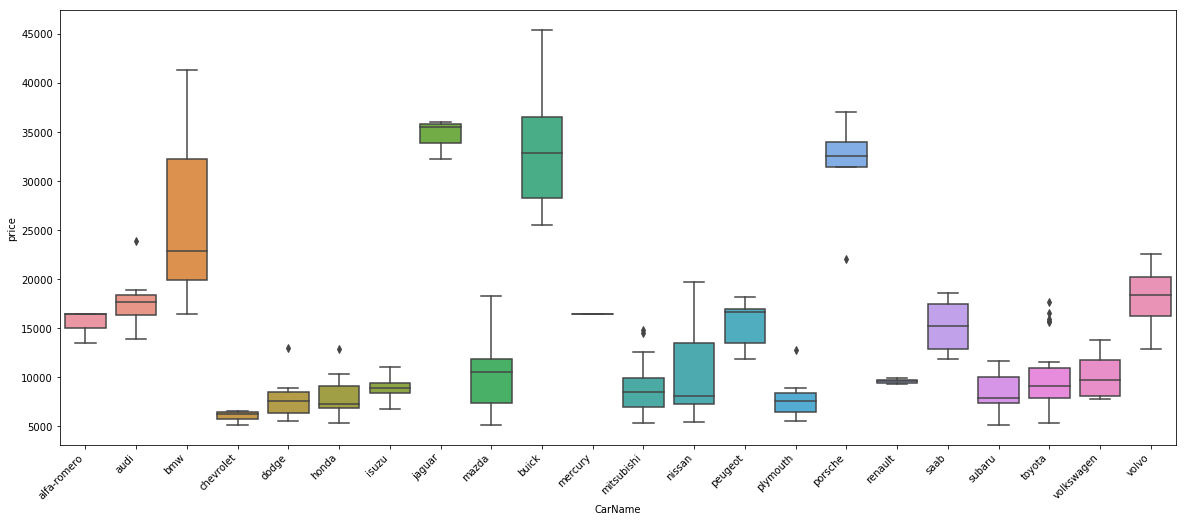

In [78]:
plt.figure(figsize=(20, 8))
ax=sns.boxplot('CarName','price',data=master)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

##### Observation: Price goes higher as we move to the premium segment

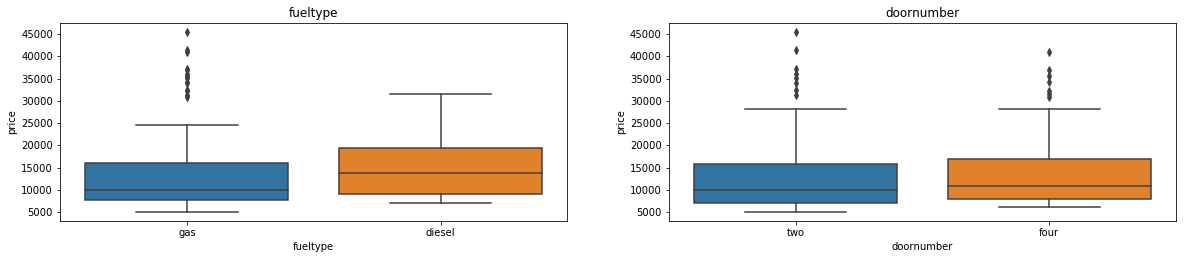

In [79]:
plt.figure(figsize=(20, 8))

# subplot 1
plt.subplot(2, 2, 1)
plt.title('fueltype')
sns.boxplot('fueltype','price',data=master)

# subplot 2
plt.subplot(2, 2, 2)
plt.title('doornumber')
sns.boxplot('doornumber','price',data=master)

##### Observation: Fueltype and Doornumber dont impact price much. Outliers seen above might belong to premium models. So lets not remove them

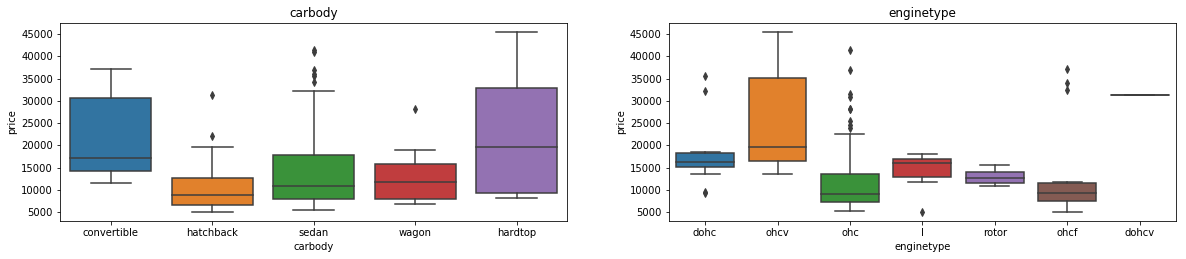

In [80]:
plt.figure(figsize=(20, 8))

# subplot 1
plt.subplot(2, 2, 1)
plt.title('carbody')
sns.boxplot('carbody','price',data=master)

# subplot 2
plt.subplot(2, 2, 2)
plt.title('enginetype')
sns.boxplot('enginetype','price',data=master)

##### Observation: Carbody - convertible and Hardtop looks costlier. Also price of engine type ohcv is on a higher side

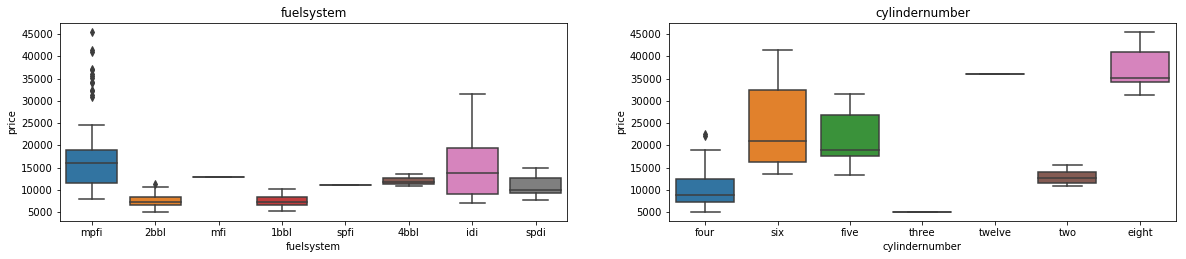

In [81]:
plt.figure(figsize=(20, 8))

# subplot 1
plt.subplot(2, 2, 1)
plt.title('fuelsystem')
sns.boxplot('fuelsystem','price',data=master)

# subplot 2
plt.subplot(2, 2, 2)
plt.title('cylindernumber')
sns.boxplot('cylindernumber','price',data=master)

##### Observation: Price is higher as the number of cylinders in the engine increases

##### Creating Derive metrics -Power-to-weight ratio. Power-to-weight ratio (or specific power or power-to-mass ratio) is a calculation commonly applied to engines and mobile power sources to enable the comparison of one unit or design to another. Power-to-weight ratio is a measurement of actual performance of any engine or power source

In [82]:
master['power2weightratio']=master['horsepower']/master['curbweight']

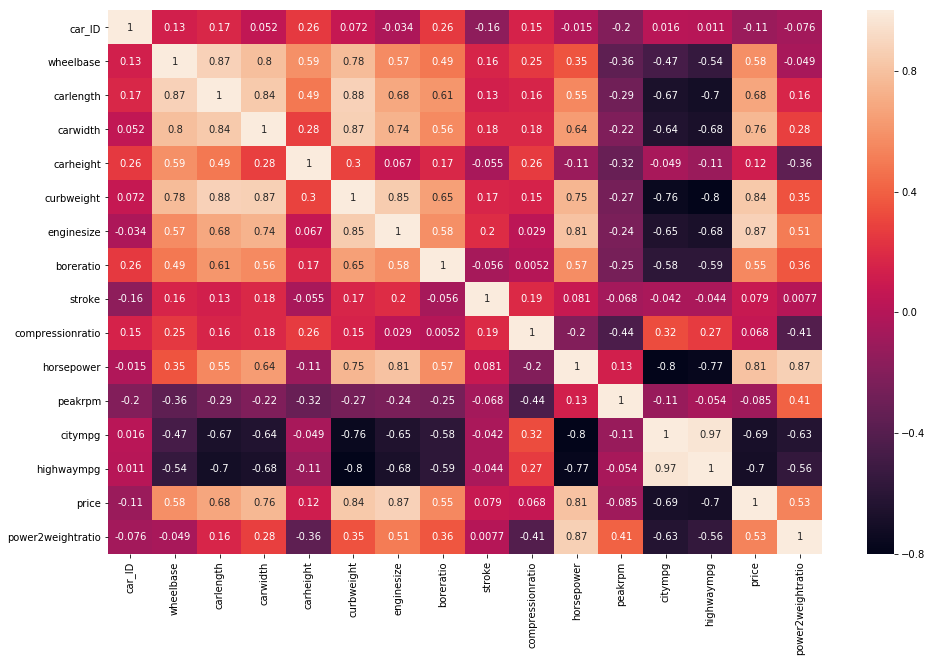

In [83]:
####Correlation Matrix
plt.figure(figsize=(16,10))    
sns.heatmap(master.corr(),annot=True)

##### wheelbase, carlength, carwidth, curbweigth and enginesize has high correlation among each other and also higly correlated with price

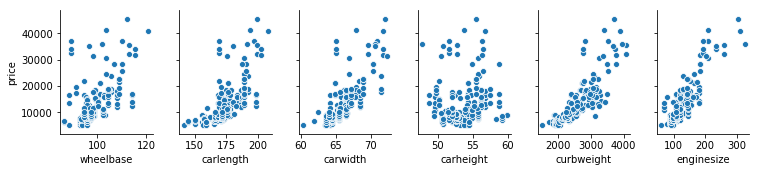

In [84]:
sns.pairplot(master, x_vars=['wheelbase','carlength','carwidth',
                            'carheight','curbweight','enginesize'], y_vars='price', aspect=0.7, kind='scatter')

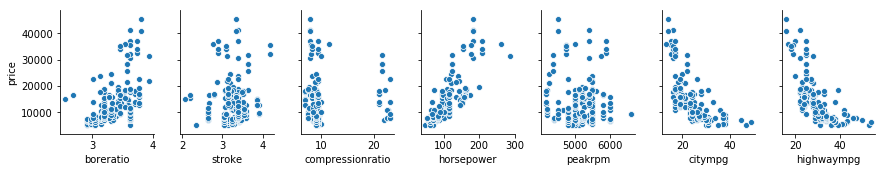

In [85]:
sns.pairplot(master, x_vars=['boreratio','stroke',
                            'compressionratio','horsepower','peakrpm',
                             'citympg','highwaympg'], y_vars='price', aspect=0.7, kind='scatter')

In [86]:
def getRSquared(DF,params):
    y=DF['price']
    for param in params:
        X=DF[param]
        X_updated = sm.add_constant(X)    
        rsquared= sm.OLS(y,X).fit().rsquared
        print("RSqaured for {param} vs Price is {rsquared}".format(param=param,rsquared=rsquared))
    
    
getRSquared(master,['carwidth','curbweight','enginesize',
                   'boreratio','stroke','horsepower','peakrpm','citympg'])

RSqaured for carwidth vs Price is 0.7562540557028414
RSqaured for curbweight vs Price is 0.857185331412019
RSqaured for enginesize vs Price is 0.9116592795656812
RSqaured for boreratio vs Price is 0.7702071885910664
RSqaured for stroke vs Price is 0.7350966204399925
RSqaured for horsepower vs Price is 0.9008627734900864
RSqaured for peakrpm vs Price is 0.7219395933285537
RSqaured for citympg vs Price is 0.550031779156456


##### Observation: Engine Size and Horse-power can alone explain the variability in price and in-turn they are highly correlated with each other

##### Before proceeding further lets create dummy variables for the categorical variables

In [87]:
####Creating dummy variables for the categories
categorical = pd.get_dummies(master[['symboling','CarName','fueltype','aspiration','doornumber',
                                    'carbody','cylindernumber','drivewheel','enginelocation',
                                    'enginetype','fuelsystem']],drop_first=True)
master = pd.concat([master,categorical],axis=1)

master.drop(['symboling','CarName','fueltype','aspiration','doornumber','carbody','cylindernumber',
             'drivewheel','enginelocation','enginetype','fuelsystem'],axis=1,inplace=True)

In [88]:
#master.to_csv("master_cat.csv")
master.head(5)

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,1,0,0,0,0,0,1,0,0
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


### Model Building

#### Data Preprocessing

In [89]:
####Predictor variables
X=master.drop(['car_ID','price'],axis=1)
####Outcome variable
y=master['price']

####Standardizing Data
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
X=X.apply(normalize)

In [90]:
####Splitting data into 75% for training and 25% for testing
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75,test_size = 0.25, 
                                                     random_state=100)
X_train.head(5)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
164,0.230321,0.411940,0.308333,0.400000,0.277735,0.139623,0.464286,0.457143,0.12500,0.091667,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
188,0.311953,0.456716,0.433333,0.658333,0.314973,0.181132,0.464286,0.633333,0.18750,0.216667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.559767,0.770149,0.925000,0.658333,0.568658,0.283019,0.464286,0.633333,0.09375,0.258333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
158,0.265306,0.376119,0.341667,0.433333,0.305275,0.184906,0.521429,0.609524,0.96875,0.033333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
123,0.486880,0.500000,0.358333,1.000000,0.406129,0.230189,0.578571,0.661905,0.09375,0.166667,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
X_train.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'power2weightratio',
       'symboling_risky', 'symboling_safe', 'CarName_audi', 'CarName_bmw',
       'CarName_buick', 'CarName_chevrolet', 'CarName_dodge', 'CarName_honda',
       'CarName_isuzu', 'CarName_jaguar', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_peugeot',
       'CarName_plymouth', 'CarName_porsche', 'CarName_renault',
       'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'drivewheel_fwd'

In [92]:
####Library and VIF custom function for model building
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 


def vif_cal(input_data):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        x_withC = sm.add_constant(x)
        rsq=sm.OLS(y,x_withC).fit().rsquared  
        if rsq==1: rsq=0.99999
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

##### Approach will be Bidirectional - Initially Model will be built using forward selection. Once the model can explain significant variation in the output we will add the remaining predictors and do backward elimination rather than directly looking into RFE

In [93]:
####OLS Model
def wrapperModel(predictors):
    X_train_rfe=X_train[predictors]
    X_updated = sm.add_constant(X_train_rfe)    
    lm= sm.OLS(y_train,X_updated).fit()
    print(lm.summary())
    return(lm)

In [94]:
predictors=['wheelbase', 'carlength']
model=wrapperModel(predictors)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     66.51
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.09e-21
Time:                        18:34:01   Log-Likelihood:                -1540.4
No. Observations:                 153   AIC:                             3087.
Df Residuals:                     150   BIC:                             3096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1329.7297   1338.787     -0.993      0.3

##### In presence of carlength, wheelbase is insignificant based on p value because of correlation. Remove wheelbase and add few more predictors

In [95]:
predictors=['carlength', 'carwidth']
model=wrapperModel(predictors)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     105.4
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.61e-29
Time:                        18:34:01   Log-Likelihood:                -1521.8
No. Observations:                 153   AIC:                             3050.
Df Residuals:                     150   BIC:                             3059.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2441.0853   1182.975     -2.064      0.0

##### Significance of carlength is reduced. Lets remove it and add carheight and curbweight

In [96]:
predictors=['carwidth', 'carheight','curbweight']
model=wrapperModel(predictors)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     142.8
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.24e-43
Time:                        18:34:01   Log-Likelihood:                -1485.3
No. Observations:                 153   AIC:                             2979.
Df Residuals:                     149   BIC:                             2991.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1495.6838   1076.228      1.390      0.1

##### Adj. R-squared has improved significantly. As carwidth is insignificant, lets remove it and add enginesize

In [97]:
predictors=['carheight','curbweight', 'enginesize']
model=wrapperModel(predictors)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     185.2
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           4.66e-50
Time:                        18:34:01   Log-Likelihood:                -1470.1
No. Observations:                 153   AIC:                             2948.
Df Residuals:                     149   BIC:                             2960.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1324.1517    881.109      1.503      0.1

##### Improvement in Adj. R-squared. Remove insignificant variable carheight and add boreratio

In [98]:
predictors=['curbweight', 'enginesize','boreratio']
model=wrapperModel(predictors)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     181.6
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.46e-49
Time:                        18:34:01   Log-Likelihood:                -1471.3
No. Observations:                 153   AIC:                             2951.
Df Residuals:                     149   BIC:                             2963.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        333.3319    943.292      0.353      0.7

##### boreratio is insignificant. Add stroke variable

In [99]:
predictors=['curbweight', 'enginesize','stroke']
model=wrapperModel(predictors)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     188.9
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.48e-50
Time:                        18:34:01   Log-Likelihood:                -1468.9
No. Observations:                 153   AIC:                             2946.
Df Residuals:                     149   BIC:                             2958.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2666.9651   1223.207      2.180      0.0

##### Adding compressionratio

In [100]:
predictors=['curbweight', 'enginesize','stroke','compressionratio']
model=wrapperModel(predictors)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     140.8
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.09e-49
Time:                        18:34:01   Log-Likelihood:                -1468.9
No. Observations:                 153   AIC:                             2948.
Df Residuals:                     148   BIC:                             2963.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2689.6200   1228.500  

##### compressionratio is insignificant. Remove it and add horsepower variable

In [101]:
predictors=['curbweight', 'enginesize','stroke','horsepower']
model=wrapperModel(predictors)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     160.3
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           9.98e-53
Time:                        18:34:01   Log-Likelihood:                -1460.9
No. Observations:                 153   AIC:                             2932.
Df Residuals:                     148   BIC:                             2947.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2082.7815   1173.804      1.774      0.0

##### Stroke variable is insignificant. Remove it and add peakrpm

In [102]:
predictors=['curbweight', 'enginesize','horsepower','peakrpm']
model=wrapperModel(predictors)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     162.0
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           5.15e-53
Time:                        18:34:02   Log-Likelihood:                -1460.2
No. Observations:                 153   AIC:                             2930.
Df Residuals:                     148   BIC:                             2946.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1361.5447   1148.973     -1.185      0.2

##### Remove peakrpm as its insignificant and add either citympg or highwaympg (both have high correlation. so add only one)

In [103]:
predictors=['curbweight', 'enginesize','horsepower','citympg']
model=wrapperModel(predictors)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     157.7
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.65e-52
Time:                        18:34:02   Log-Likelihood:                -1461.9
No. Observations:                 153   AIC:                             2934.
Df Residuals:                     148   BIC:                             2949.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -675.9931   1859.462     -0.364      0.7

##### citimpg is insignificant. Lets as Risk rating variables

In [104]:
predictors=['curbweight', 'enginesize','horsepower','symboling_risky','symboling_safe']
model=wrapperModel(predictors)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     126.3
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.16e-51
Time:                        18:34:02   Log-Likelihood:                -1461.4
No. Observations:                 153   AIC:                             2935.
Df Residuals:                     147   BIC:                             2953.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             343.5585    661.781     

##### Risk rating variables are insignificant. Lets remove them and add carnames

In [105]:
predictors=['curbweight', 'enginesize','horsepower','CarName_audi', 'CarName_bmw', 'CarName_buick',
            'CarName_jaguar','CarName_mazda', 'CarName_mitsubishi','CarName_nissan', 'CarName_peugeot',
            'CarName_porsche', 'CarName_saab', 'CarName_subaru','CarName_toyota', 
            'CarName_volkswagen', 'CarName_volvo']
model=wrapperModel(predictors)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     102.6
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.16e-68
Time:                        18:34:02   Log-Likelihood:                -1387.5
No. Observations:                 153   AIC:                             2811.
Df Residuals:                     135   BIC:                             2866.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2868.9545    574

##### Adj. R-squared has improved from 0.805 to 0.919. Based on the p value and pointers from EDA, remove in-significant values

In [106]:
predictors=['curbweight', 'enginesize','horsepower','CarName_audi', 'CarName_bmw','CarName_buick',
            'CarName_jaguar','CarName_mazda', 'CarName_mitsubishi','CarName_porsche', 'CarName_saab',
            'CarName_subaru','CarName_toyota', 'CarName_volkswagen', 'CarName_volvo']
model=wrapperModel(predictors)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     117.3
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.63e-70
Time:                        18:34:02   Log-Likelihood:                -1387.9
No. Observations:                 153   AIC:                             2808.
Df Residuals:                     137   BIC:                             2856.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2696.9965    533

##### Adj. R-squared has slightly improved. Further remove insignificant variables

In [107]:
predictors=['curbweight', 'enginesize','horsepower','CarName_audi', 'CarName_bmw', 'CarName_buick',
            'CarName_jaguar','CarName_mazda', 'CarName_mitsubishi','CarName_porsche', 'CarName_volvo']
model=wrapperModel(predictors)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     156.6
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           3.07e-73
Time:                        18:34:02   Log-Likelihood:                -1391.5
No. Observations:                 153   AIC:                             2807.
Df Residuals:                     141   BIC:                             2843.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2600.3290    503

In [108]:
predictors=['curbweight', 'enginesize','horsepower','CarName_audi', 'CarName_bmw','CarName_buick',
            'CarName_jaguar','CarName_mazda','CarName_porsche', 'CarName_volvo']
print(wrapperModel(predictors))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     168.6
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.43e-73
Time:                        18:34:03   Log-Likelihood:                -1393.5
No. Observations:                 153   AIC:                             2809.
Df Residuals:                     142   BIC:                             2842.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2456.5914    503.018     

##### Based on the p-value enginesize is insignificant. Lets remove and check the metrics

In [109]:
predictors=['curbweight','horsepower','CarName_audi', 'CarName_bmw','CarName_buick', 'CarName_jaguar',
            'CarName_mazda','CarName_porsche', 'CarName_volvo']
model=wrapperModel(predictors)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     184.6
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           4.26e-74
Time:                        18:34:03   Log-Likelihood:                -1395.0
No. Observations:                 153   AIC:                             2810.
Df Residuals:                     143   BIC:                             2840.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2682.0322    488.489     

##### Lets add couple of more predictor variables -carbody, fueltype and door and continue analysing the statistical significance of variables and remove insignificant variables

In [110]:
predictors=['curbweight','horsepower','CarName_audi', 'CarName_bmw','CarName_buick', 'CarName_jaguar',
            'CarName_mazda','CarName_porsche', 'CarName_volvo','fueltype_gas','aspiration_turbo',
            'doornumber_two','carbody_hardtop','carbody_hatchback', 'carbody_sedan', 'carbody_wagon']
model=wrapperModel(predictors)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     124.8
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           6.53e-73
Time:                        18:34:03   Log-Likelihood:                -1378.4
No. Observations:                 153   AIC:                             2791.
Df Residuals:                     136   BIC:                             2842.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              9356.8336   1618.85

In [111]:
predictors=['curbweight','horsepower','CarName_audi', 'CarName_bmw','CarName_buick', 'CarName_jaguar',
            'CarName_mazda','CarName_porsche', 'CarName_volvo','fueltype_gas','carbody_hardtop',
            'carbody_hatchback', 'carbody_sedan', 'carbody_wagon']
print(wrapperModel(predictors))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     144.2
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           5.72e-75
Time:                        18:34:03   Log-Likelihood:                -1378.7
No. Observations:                 153   AIC:                             2787.
Df Residuals:                     138   BIC:                             2833.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              8890.9083   1419.60

In [112]:
predictors=['curbweight','horsepower','CarName_audi', 'CarName_bmw','CarName_buick', 'CarName_jaguar',
            'CarName_mazda','CarName_porsche', 'CarName_volvo','fueltype_gas','carbody_hatchback',
            'carbody_sedan', 'carbody_wagon']
model=wrapperModel(predictors)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     153.0
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.81e-75
Time:                        18:34:03   Log-Likelihood:                -1380.2
No. Observations:                 153   AIC:                             2788.
Df Residuals:                     139   BIC:                             2831.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              7844.5427   1283.93

##### Lets add cylindernumber variable and continue our model building by removing insignificant variables

In [113]:
predictors=['curbweight','horsepower','CarName_audi', 'CarName_bmw','CarName_buick', 'CarName_jaguar',
            'CarName_mazda','CarName_porsche', 'CarName_volvo','fueltype_gas','carbody_hatchback',
            'carbody_sedan', 'carbody_wagon','cylindernumber_five', 'cylindernumber_four', 
            'cylindernumber_six','cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two']
model=wrapperModel(predictors)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     107.6
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           5.14e-71
Time:                        18:34:03   Log-Likelihood:                -1375.1
No. Observations:                 153   AIC:                             2790.
Df Residuals:                     133   BIC:                             2851.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7664.50

In [114]:
predictors=['curbweight','horsepower','CarName_audi', 'CarName_bmw','CarName_buick', 'CarName_jaguar',
            'CarName_mazda','CarName_porsche', 'CarName_volvo','fueltype_gas','carbody_hatchback',
            'carbody_sedan', 'carbody_wagon','cylindernumber_five', 'cylindernumber_six',
            'cylindernumber_three', 'cylindernumber_two']
model=wrapperModel(predictors)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     122.0
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           4.24e-73
Time:                        18:34:04   Log-Likelihood:                -1375.1
No. Observations:                 153   AIC:                             2786.
Df Residuals:                     135   BIC:                             2841.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7936.9961 

In [115]:
predictors=['curbweight','horsepower','CarName_audi', 'CarName_bmw','CarName_buick', 'CarName_jaguar',
            'CarName_mazda','CarName_porsche', 'CarName_volvo','fueltype_gas','carbody_hatchback',
            'carbody_sedan', 'carbody_wagon', 'cylindernumber_six','cylindernumber_two']
model=wrapperModel(predictors)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     136.7
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.59e-74
Time:                        18:34:04   Log-Likelihood:                -1377.0
No. Observations:                 153   AIC:                             2786.
Df Residuals:                     137   BIC:                             2834.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               8026.0241   1268

In [116]:
predictors=['curbweight','horsepower','CarName_audi', 'CarName_bmw','CarName_buick', 'CarName_jaguar',
            'CarName_porsche', 'CarName_volvo','fueltype_gas','carbody_hatchback',
            'carbody_sedan', 'carbody_wagon', 'cylindernumber_six','cylindernumber_two']
model=wrapperModel(predictors)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     145.6
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.98e-75
Time:                        18:34:04   Log-Likelihood:                -1377.9
No. Observations:                 153   AIC:                             2786.
Df Residuals:                     138   BIC:                             2831.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               8161.5997   1267

##### lets add engine location and drivewheel variable

In [117]:
predictors=['curbweight','horsepower','CarName_audi', 'CarName_bmw','CarName_buick', 'CarName_jaguar',
            'CarName_porsche', 'CarName_volvo','fueltype_gas','carbody_hatchback',
            'carbody_sedan', 'carbody_wagon', 'cylindernumber_six','cylindernumber_two',
            'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_rear']
model=wrapperModel(predictors)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     128.5
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.60e-74
Time:                        18:34:04   Log-Likelihood:                -1371.4
No. Observations:                 153   AIC:                             2779.
Df Residuals:                     135   BIC:                             2833.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5426.3410   1

In [118]:
predictors=['curbweight','horsepower','CarName_audi', 'CarName_bmw','CarName_buick', 'CarName_jaguar',
            'CarName_porsche', 'CarName_volvo','fueltype_gas','carbody_hatchback',
            'carbody_sedan', 'carbody_wagon','cylindernumber_two',
            'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_rear']
model=wrapperModel(predictors)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     137.0
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.78e-75
Time:                        18:34:04   Log-Likelihood:                -1371.7
No. Observations:                 153   AIC:                             2777.
Df Residuals:                     136   BIC:                             2829.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5219.2066   1

In [119]:
predictors=['curbweight','horsepower','CarName_audi', 'CarName_bmw','CarName_buick', 'CarName_jaguar',
            'CarName_porsche', 'CarName_volvo','fueltype_gas','carbody_hatchback',
            'carbody_sedan', 'carbody_wagon','cylindernumber_two','enginelocation_rear']
model=wrapperModel(predictors)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     156.6
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.81e-77
Time:                        18:34:04   Log-Likelihood:                -1372.7
No. Observations:                 153   AIC:                             2775.
Df Residuals:                     138   BIC:                             2821.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                6448.3116   1

##### Adding final set of predictors - enginetype and fuel system

In [120]:
predictors=['curbweight','horsepower','CarName_audi', 'CarName_bmw','CarName_buick', 'CarName_jaguar',
            'CarName_porsche', 'CarName_volvo','fueltype_gas','carbody_hatchback',
            'carbody_sedan', 'carbody_wagon','cylindernumber_two','enginelocation_rear',
            'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf','enginetype_ohcv',
            'enginetype_rotor', 'fuelsystem_2bbl','fuelsystem_4bbl', 'fuelsystem_idi', 
            'fuelsystem_mfi','fuelsystem_mpfi', 'fuelsystem_spdi']
model=wrapperModel(predictors)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     88.76
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           4.34e-68
Time:                        18:34:04   Log-Likelihood:                -1369.4
No. Observations:                 153   AIC:                             2789.
Df Residuals:                     128   BIC:                             2865.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3972.8449    

##### Removing insignicant predictors

In [121]:
predictors=['curbweight','horsepower','CarName_audi', 'CarName_bmw','CarName_buick', 'CarName_jaguar',
            'CarName_porsche', 'CarName_volvo','fueltype_gas','carbody_hatchback',
            'carbody_sedan', 'carbody_wagon','cylindernumber_two','enginelocation_rear',
            'enginetype_dohcv','enginetype_ohcf','enginetype_ohcv','enginetype_rotor', 
            'fuelsystem_idi','fuelsystem_mfi','fuelsystem_mpfi', 'fuelsystem_spdi']
model=wrapperModel(predictors)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     109.4
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           5.17e-72
Time:                        18:34:05   Log-Likelihood:                -1369.7
No. Observations:                 153   AIC:                             2781.
Df Residuals:                     132   BIC:                             2845.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3787.5388    

In [122]:
predictors=['curbweight','horsepower','CarName_audi', 'CarName_bmw','CarName_buick', 'CarName_jaguar',
            'CarName_porsche', 'CarName_volvo','fueltype_gas','carbody_hatchback',
            'carbody_sedan', 'carbody_wagon','cylindernumber_two','enginelocation_rear',
            'enginetype_ohcf','enginetype_rotor', 'fuelsystem_idi','fuelsystem_mfi']
model=wrapperModel(predictors)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     136.4
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.26e-75
Time:                        18:34:05   Log-Likelihood:                -1372.0
No. Observations:                 153   AIC:                             2778.
Df Residuals:                     136   BIC:                             2829.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3790.4581    

In [123]:
predictors=['curbweight','horsepower','CarName_audi', 'CarName_bmw','CarName_buick', 'CarName_jaguar',
            'CarName_porsche', 'CarName_volvo','fueltype_gas','carbody_hatchback',
            'carbody_sedan', 'carbody_wagon','cylindernumber_two','enginelocation_rear',
            'enginetype_rotor', 'fuelsystem_idi']
model=wrapperModel(predictors)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     156.6
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.81e-77
Time:                        18:34:05   Log-Likelihood:                -1372.7
No. Observations:                 153   AIC:                             2775.
Df Residuals:                     138   BIC:                             2821.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3809.1672    

##### Now we have a good set of predictors with p value in range. Lets further do multi- collinearity analysis 

In [124]:
predictors=['curbweight','horsepower','CarName_audi', 'CarName_bmw','CarName_buick', 'CarName_jaguar',
            'CarName_porsche', 'CarName_volvo','fueltype_gas','carbody_hatchback',
            'carbody_sedan', 'carbody_wagon','cylindernumber_two','enginelocation_rear',
            'enginetype_rotor', 'fuelsystem_idi']
vif_cal(X_train[predictors])

,Var,Vif
8,fueltype_gas,100000.00
12,cylindernumber_two,100000.00
14,enginetype_rotor,100000.00
15,fuelsystem_idi,100000.00
10,carbody_sedan,7.39
9,carbody_hatchback,6.74
0,curbweight,6.45
1,horsepower,5.79
11,carbody_wagon,4.28
6,CarName_porsche,2.60


##### Lets remove variables with high VIF

In [125]:
predictors=['curbweight','horsepower','CarName_audi', 'CarName_bmw','CarName_buick', 'CarName_jaguar',
            'CarName_porsche', 'CarName_volvo','carbody_hatchback','carbody_sedan',
            'carbody_wagon','enginelocation_rear','enginetype_rotor', 'fuelsystem_idi']
model=wrapperModel(predictors)
vif_cal(X_train[predictors])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     156.6
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.81e-77
Time:                        18:34:05   Log-Likelihood:                -1372.7
No. Observations:                 153   AIC:                             2775.
Df Residuals:                     138   BIC:                             2821.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4979.1901    

,Var,Vif
9,carbody_sedan,7.39
8,carbody_hatchback,6.74
0,curbweight,6.45
1,horsepower,5.79
10,carbody_wagon,4.28
6,CarName_porsche,2.60
11,enginelocation_rear,2.40
13,fuelsystem_idi,1.77
4,CarName_buick,1.49
5,CarName_jaguar,1.49


In [126]:
predictors=['curbweight','horsepower','CarName_audi', 'CarName_bmw','CarName_buick', 'CarName_jaguar',
            'CarName_porsche', 'CarName_volvo','carbody_hatchback','carbody_wagon',
            'enginelocation_rear','enginetype_rotor', 'fuelsystem_idi']
model=wrapperModel(predictors)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     163.2
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.78e-77
Time:                        18:34:06   Log-Likelihood:                -1375.6
No. Observations:                 153   AIC:                             2779.
Df Residuals:                     139   BIC:                             2822.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3121.9335    

In [127]:
predictors=['curbweight','horsepower','CarName_audi', 'CarName_bmw','CarName_buick', 'CarName_jaguar',
            'CarName_porsche', 'CarName_volvo','carbody_wagon','enginelocation_rear','enginetype_rotor', 'fuelsystem_idi']
model=wrapperModel(predictors)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     174.5
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           7.80e-78
Time:                        18:34:06   Log-Likelihood:                -1377.1
No. Observations:                 153   AIC:                             2780.
Df Residuals:                     140   BIC:                             2820.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2739.1885    

In [128]:
predictors=['curbweight','horsepower','CarName_audi', 'CarName_bmw','CarName_buick', 'CarName_jaguar',
            'CarName_porsche', 'CarName_volvo','carbody_wagon','enginelocation_rear','enginetype_rotor']
model=wrapperModel(predictors)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     187.4
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.44e-78
Time:                        18:34:06   Log-Likelihood:                -1378.7
No. Observations:                 153   AIC:                             2781.
Df Residuals:                     141   BIC:                             2818.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2615.9896    

In [129]:
predictors=['curbweight','horsepower','CarName_audi', 'CarName_bmw','CarName_buick', 'CarName_jaguar',
            'CarName_porsche', 'CarName_volvo','carbody_wagon','enginelocation_rear']
model=wrapperModel(predictors)
vif_cal(X_train[predictors])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     202.3
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           9.17e-79
Time:                        18:34:06   Log-Likelihood:                -1380.5
No. Observations:                 153   AIC:                             2783.
Df Residuals:                     142   BIC:                             2816.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2673.7598    

,Var,Vif
0,curbweight,4.20
1,horsepower,3.82
6,CarName_porsche,2.50
9,enginelocation_rear,1.98
4,CarName_buick,1.46
5,CarName_jaguar,1.43
8,carbody_wagon,1.17
3,CarName_bmw,1.14
7,CarName_volvo,1.13
2,CarName_audi,1.08


#### All values looks in range with Adj. R-squared = 0.93. Lets further reduce the variables based on EDA knowledge  

##### Removing carbody_wagon as it doesnt affect the price significantly

In [130]:
predictors=['curbweight','horsepower','CarName_audi', 'CarName_bmw','CarName_buick', 'CarName_jaguar',
            'CarName_porsche', 'CarName_volvo','enginelocation_rear']
finalModel=wrapperModel(predictors)
vif_cal(X_train[predictors])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     213.3
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           3.06e-78
Time:                        18:34:07   Log-Likelihood:                -1384.8
No. Observations:                 153   AIC:                             2790.
Df Residuals:                     143   BIC:                             2820.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2780.0225    

,Var,Vif
0,curbweight,3.65
1,horsepower,3.56
6,CarName_porsche,2.50
8,enginelocation_rear,1.98
4,CarName_buick,1.42
5,CarName_jaguar,1.39
3,CarName_bmw,1.12
7,CarName_volvo,1.12
2,CarName_audi,1.08


##### Lets finalize this model as we have all values in range and go-ahead with evaluation metrics

In [131]:
predictors=['curbweight','horsepower','CarName_audi', 'CarName_bmw','CarName_buick', 'CarName_jaguar',
            'CarName_porsche', 'CarName_volvo','enginelocation_rear']
X_final_predictors=predictors

### Model Evaluation

In [132]:
####Predictions on the test set
X_test_model = X_test[X_train[X_final_predictors].columns]
X_test_model = sm.add_constant(X_test_model)
y_pred = finalModel.predict(X_test_model)

In [133]:
####Metrics
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print('R squared:',r_squared)
print('Mean_Squared_Error :' ,mse)
print('RMSE :', np.sqrt(mse))

R squared: 0.8918378106
Mean_Squared_Error : 7484415.14185
RMSE : 2735.76591503


##### R squared on the test data is 0.89

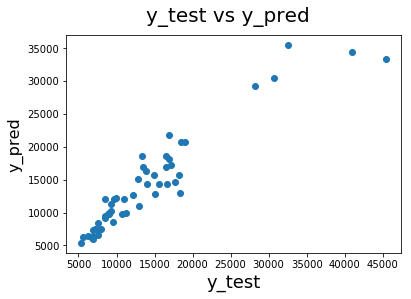

In [134]:
####y_test vs y_pred 
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16) 

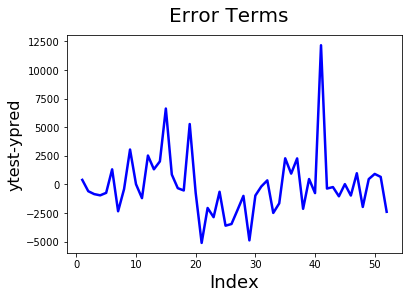

In [135]:
#Residual Errors
c = [i for i in range(1,53,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                    
plt.ylabel('ytest-ypred', fontsize=16)          

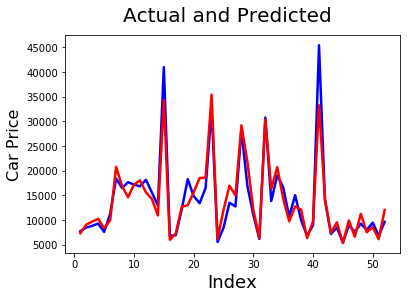

In [136]:
# Actual and Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,53,1)] 
fig = plt.figure() 
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-") 
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-") 
fig.suptitle('Actual and Predicted', fontsize=20)               
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Car Price', fontsize=16)                       

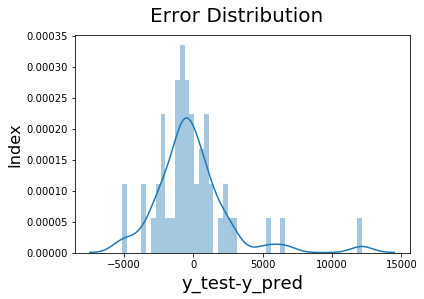

In [137]:
####Error Distribution
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Distribution', fontsize=20)                   
plt.xlabel('y_test-y_pred', fontsize=18)                  
plt.ylabel('Index', fontsize=16)                          

### Conclusion

#### Based on the data analysis and modelling, the final model obtained has an R sqaured value of 0.931 and Adjusted R squared value of 0.926. The major factors driving the price are

1. Horse Power
2. Curb Weight 
3. Engine location
4. Premium car segments - BMW, Buick, Jaguar, Porsche Audi and Volvo

#### So based on the analysis,  chinese automobile company Geely Auto can produce some high performance vehicles or venture into premium market segments 